In [36]:
#imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
#loading dataset
df = pd.read_csv('Data/ingredientsV1.csv', sep=",")

In [3]:
df.head(30)

,id,brand,name,ingredients,weight
0,AVphBRHOilAPnD_x0OrE,Simon Fischer,Simon Fischer Fruit Bttr Prune Lekvar,"Dried Prunes,Water,Corn Syrup,Sugar,Pectin.",10.6 pounds
1,AVpfNFy1LJeJML434ma2,McCormick,McCORMICK GRILL MATES MOLASSES BACON SEASONING...,"Salt,Sugar,Molasses (Refinery Syrup, Molasses,...",3.5 ounces
2,AVpgT49VLJeJML43MJEz,Jolly Time,Jolly Time Popcorn,"Salt, Yellow 5 Lake, Tricalcium Phosphate And ...",1.8 pounds
3,AVphYgnzLJeJML43aPp2,Ziyad,Ziyad Tahini Sesame Sauce,Mechanically hulled seasame seeds.Allergy Info...,1.6 pounds
4,AVpiS0bOLJeJML43kRsh,Fla-Vor-Ice,Fla-Vor-Ice Plus Giant Pops,FALSE,18 pounds
5,AVpfiMykilAPnD_xdedK,Hero,Hero Fruit Sprd Blk Currant-12 Oz -pack of 8,"Red Raspberries,Sugar,Glucose Syrup,Citric Aci...",3.5 lbs
6,AVpgPmxs1cnluZ0-ypMt,Simply Asia,Simply Asia Noodle Bowl Mandarin Orange -- 8.5 oz,"Noodles: wheat flour,water,wheat gluten,modifi...",3.4 pounds
7,AVphcTTBLJeJML43a9fO,EMERIL S,Italian Bread Crumbs,"Wheat Flour,Soybean Oil,Salt,Dehydrated Garlic...",NaN
8,AVpfwHjULJeJML43DEtY,Back to Nature,BACK TO NATURE CEREAL ORANGE CRUNCH GRAN,"Rolled Oats,Brown Rice Syrup,Evaporated Cane J...",4.7 pounds
9,AVphhxMQ1cnluZ0-Dif0,Nutrament,Nutrament Strawberry Complete Nutrition Drink ...,"Skim Milk,Sugar,Corn Syrup,Canola Oil,High Ole...",NaN


In [4]:
df.shape

(10000, 5)

In [5]:
df["brand"].value_counts()

Goya Food                    77
Roland                       75
CVS Gold Emblem              75
Bob's Red Mill               71
Smart Sense                  70
                             ..
Coco                          1
LC-Foods                      1
Farley's & Sathers            1
Jim's Cheese Pantry, Inc.     1
Mini Babybel                  1
Name: brand, Length: 3143, dtype: int64

Remove id and name columns

In [6]:
df_temp = df[['brand','weight']]
df_temp.head()

,brand,weight
0,Simon Fischer,10.6 pounds
1,McCormick,3.5 ounces
2,Jolly Time,1.8 pounds
3,Ziyad,1.6 pounds
4,Fla-Vor-Ice,18 pounds


EDA

Transform ingredients in list

In [9]:
df["ingredients"]

0             Dried Prunes,Water,Corn Syrup,Sugar,Pectin.
1       Salt,Sugar,Molasses (Refinery Syrup, Molasses,...
2       Salt, Yellow 5 Lake, Tricalcium Phosphate And ...
3       Mechanically hulled seasame seeds.Allergy Info...
4                                                   FALSE
                              ...                        
9995                  water,natural hickory smoke flavor.
9996    Organic Dry Roasted Almonds,Organic Tamari Soy...
9997    Cashews, Vegetable Oil (May Contain One Or Mor...
9998    Whole Grain Brown Rice Flour,Degerminated Mill...
9999    Non-GMO Whole Grain Wheat,Non-GMO Whole Grain ...
Name: ingredients, Length: 10000, dtype: object

Transform data in lower case data

In [12]:
df['ingredients_lower'] = df["ingredients"].str.lower()

In [13]:
df['ingredients_lower']

0             dried prunes,water,corn syrup,sugar,pectin.
1       salt,sugar,molasses (refinery syrup, molasses,...
2       salt, yellow 5 lake, tricalcium phosphate and ...
3       mechanically hulled seasame seeds.allergy info...
4                                                   false
                              ...                        
9995                  water,natural hickory smoke flavor.
9996    organic dry roasted almonds,organic tamari soy...
9997    cashews, vegetable oil (may contain one or mor...
9998    whole grain brown rice flour,degerminated mill...
9999    non-gmo whole grain wheat,non-gmo whole grain ...
Name: ingredients_lower, Length: 10000, dtype: object

Remove innecesary characters

In [29]:
df['ingredients_no_special_char'] = df['ingredients_lower'].apply(lambda x: re.sub('[^,a-zA-Z ]+', '', str(x)))
df['ingredients_no_special_char'] 

0              dried prunes,water,corn syrup,sugar,pectin
1       salt,sugar,molasses refinery syrup, molasses, ...
2       salt, yellow  lake, tricalcium phosphate and a...
3       mechanically hulled seasame seedsallergy infor...
4                                                   false
                              ...                        
9995                   water,natural hickory smoke flavor
9996    organic dry roasted almonds,organic tamari soy...
9997    cashews, vegetable oil may contain one or more...
9998    whole grain brown rice flour,degerminated mill...
9999    nongmo whole grain wheat,nongmo whole grain oa...
Name: ingredients_no_special_char, Length: 10000, dtype: object

Transform to a list

In [91]:
df['ingredients_list'] = df['ingredients_no_special_char'].str.split(',')

In [92]:
df['ingredients_list']

0        [dried prunes, water, corn syrup, sugar, pectin]
1       [salt, sugar, molasses refinery syrup,  molass...
2       [salt,  yellow  lake,  tricalcium phosphate an...
3       [mechanically hulled seasame seedsallergy info...
4                                                 [false]
                              ...                        
9995                [water, natural hickory smoke flavor]
9996    [organic dry roasted almonds, organic tamari s...
9997    [cashews,  vegetable oil may contain one or mo...
9998    [whole grain brown rice flour, degerminated mi...
9999    [nongmo whole grain wheat, nongmo whole grain ...
Name: ingredients_list, Length: 10000, dtype: object

In [93]:
def removeSpace(x):
    return [y.strip() for y in x]

In [94]:
df['ingredients_list'].apply(removeSpace)

0        [dried prunes, water, corn syrup, sugar, pectin]
1       [salt, sugar, molasses refinery syrup, molasse...
2       [salt, yellow  lake, tricalcium phosphate and ...
3       [mechanically hulled seasame seedsallergy info...
4                                                 [false]
                              ...                        
9995                [water, natural hickory smoke flavor]
9996    [organic dry roasted almonds, organic tamari s...
9997    [cashews, vegetable oil may contain one or mor...
9998    [whole grain brown rice flour, degerminated mi...
9999    [nongmo whole grain wheat, nongmo whole grain ...
Name: ingredients_list, Length: 10000, dtype: object

In [95]:
def removeStopWords(lst_ingredients):
    ingredients2 = []
    receipe = []
    for index, ingredients in enumerate(lst_ingredients):
        ing_word = ingredients.split(" ")
        ing_word = [i for i in ing_word if i not in STOPWORDS]
        ingredients2.append(" ".join(ing_word))
    ingredients = ingredients2[:]
    return ingredients

In [96]:
df['ingredients_list'].apply(removeStopWords)

0        [dried prunes, water, corn syrup, sugar, pectin]
1       [salt, sugar, molasses refinery syrup,  molass...
2       [salt,  yellow  lake,  tricalcium phosphate ar...
3       [mechanically hulled seasame seedsallergy info...
4                                                 [false]
                              ...                        
9995                [water, natural hickory smoke flavor]
9996    [organic dry roasted almonds, organic tamari s...
9997    [cashews,  vegetable oil may contain one follo...
9998    [whole grain brown rice flour, degerminated mi...
9999    [nongmo whole grain wheat, nongmo whole grain ...
Name: ingredients_list, Length: 10000, dtype: object

In [102]:
ingredients_dict = {}
for recipe in df['ingredients_list']:
    #print(recipe)
    for ingredient in recipe:
        #print(ingredient.strip())
        ingredients_dict[ingredient.strip()] = ingredients_dict.get(ingredient.strip(),0)+ 1
        
ingredients_dict

{'dried prunes': 1,
 'water': 2472,
 'corn syrup': 1231,
 'sugar': 4164,
 'pectin': 151,
 'salt': 5250,
 'molasses refinery syrup': 1,
 'molasses': 326,
 'caramel color': 657,
 'spices including black pepper': 7,
 'garlic onion': 1,
 'tapioca maltodextrin': 14,
 'bacon fat and cooked bacon cured with water': 1,
 'sodium erythorbate': 117,
 'sodium nitrate': 19,
 'silicon dioxide to make free flowing': 2,
 'autolyzed yeast': 45,
 'sunflower oil': 319,
 'corn maltodextrin': 25,
 'vinegar': 359,
 'extractives of paprika': 49,
 'and natural flavor including smoke': 1,
 'yellow  lake': 319,
 'tricalcium phosphate and artificial butter flavor': 1,
 'mechanically hulled seasame seedsallergy information packed in a facility that processes wheat': 2,
 'flour': 39,
 'peanuts and tree nuts': 7,
 'false': 1,
 'red raspberries': 8,
 'glucose syrup': 124,
 'citric acid': 2034,
 'pectin contains wheat': 1,
 'noodles wheat flour': 5,
 'wheat gluten': 253,
 'modified tapioca starch': 36,
 'sodium algin

df

In [103]:
df.head()

,id,brand,name,ingredients,weight,ingredients_lower,ingredients_list,ingredients_no_special_char
0,AVphBRHOilAPnD_x0OrE,Simon Fischer,Simon Fischer Fruit Bttr Prune Lekvar,"Dried Prunes,Water,Corn Syrup,Sugar,Pectin.",10.6 pounds,"dried prunes,water,corn syrup,sugar,pectin.","[dried prunes, water, corn syrup, sugar, pectin]","dried prunes,water,corn syrup,sugar,pectin"
1,AVpfNFy1LJeJML434ma2,McCormick,McCORMICK GRILL MATES MOLASSES BACON SEASONING...,"Salt,Sugar,Molasses (Refinery Syrup, Molasses,...",3.5 ounces,"salt,sugar,molasses (refinery syrup, molasses,...","[salt, sugar, molasses refinery syrup, molass...","salt,sugar,molasses refinery syrup, molasses, ..."
2,AVpgT49VLJeJML43MJEz,Jolly Time,Jolly Time Popcorn,"Salt, Yellow 5 Lake, Tricalcium Phosphate And ...",1.8 pounds,"salt, yellow 5 lake, tricalcium phosphate and ...","[salt, yellow lake, tricalcium phosphate an...","salt, yellow lake, tricalcium phosphate and a..."
3,AVphYgnzLJeJML43aPp2,Ziyad,Ziyad Tahini Sesame Sauce,Mechanically hulled seasame seeds.Allergy Info...,1.6 pounds,mechanically hulled seasame seeds.allergy info...,[mechanically hulled seasame seedsallergy info...,mechanically hulled seasame seedsallergy infor...
4,AVpiS0bOLJeJML43kRsh,Fla-Vor-Ice,Fla-Vor-Ice Plus Giant Pops,FALSE,18 pounds,false,[false],false


In [5]:
def separate(data):
    return data.str[0:].str.split(',', expand= True)

In [6]:
df_split_ingredients = separate(df['ingredients'])

In [7]:
df_split_ingredients

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,Dried Prunes,Water,Corn Syrup,Sugar,Pectin.,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Salt,Sugar,Molasses (Refinery Syrup,Molasses,Caramel Color),Spices (Including Black Pepper),Garlic Onion,Tapioca Maltodextrin,Bacon Fat and Cooked Bacon (Cured with Water,Salt,...,None,None,None,None,None,None,None,None,None,None
2,Salt,Yellow 5 Lake,Tricalcium Phosphate And Artificial Butter Fl...,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Mechanically hulled seasame seeds.Allergy Info...,flour,peanuts and tree nuts.,Mechanically hulled seasame seeds.Allergy Info...,flour,peanuts and tree nuts.,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,FALSE,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,water,natural hickory smoke flavor.,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9996,Organic Dry Roasted Almonds,Organic Tamari Soy Sauce (Water,Organic Soybeans,Sea Salt).,Organic Tamari Soy Sauce (Water,Organic Soybeans,Sea Salt),.,None,None,...,None,None,None,None,None,None,None,None,None,None
9997,Cashews,Vegetable Oil (May Contain One Or More Of The...,Canola,Sunflower And/Or Soybean Oil),Sea Salt.,Cashews,Vegetable Oil (May Contain One Or More Of The ...,Canola,Sunflower And/Or Soybean Oil),Sea Salt.,...,None,None,None,None,None,None,None,None,None,None
9998,Whole Grain Brown Rice Flour,Degerminated Milled Corn,Sunflower Oil,Dry Whey,Salt,Maltodextrin,Cheddar Cheese (Cultured Milk,Enzymes,Annatto [Color]),Butter Oil,...,None,None,None,None,None,None,None,None,None,None


Create final dataframe.

In [8]:
df_final = pd.concat([df_temp, df_split_ingredients], axis=1)

In [9]:
df_final.head()

,brand,weight,0,1,2,3,4,5,6,7,...,185,186,187,188,189,190,191,192,193,194
0,Simon Fischer,10.6 pounds,Dried Prunes,Water,Corn Syrup,Sugar,Pectin.,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,McCormick,3.5 ounces,Salt,Sugar,Molasses (Refinery Syrup,Molasses,Caramel Color),Spices (Including Black Pepper),Garlic Onion,Tapioca Maltodextrin,...,None,None,None,None,None,None,None,None,None,None
2,Jolly Time,1.8 pounds,Salt,Yellow 5 Lake,Tricalcium Phosphate And Artificial Butter Fl...,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Ziyad,1.6 pounds,Mechanically hulled seasame seeds.Allergy Info...,flour,peanuts and tree nuts.,Mechanically hulled seasame seeds.Allergy Info...,flour,peanuts and tree nuts.,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Fla-Vor-Ice,18 pounds,FALSE,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [10]:
#number of features
print ("Number of features : {}".format(len(df_final.columns.values)))
print ("Number of sample : {}".format(df_final.shape[0]))

Number of features : 197
Number of sample : 10000


Out of these 15 features 'Salary' is the target feature and rest all are covariates.

In [11]:
#let see if any cloumn has missing values
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 197 entries, brand to 194
dtypes: object(197)
memory usage: 15.0+ MB


All the columns are objects


In [12]:
list(df_final)

['brand',
 'weight',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 18

Let's see the classes of the categorical variables

In [34]:
le = preprocessing.LabelEncoder()
#print('brand\n',set(df_final['brand']))
#print('\nweight\n',set(df_final['weight']))
print('\n1\n',set(df_final[1]))
#df_final[1] = df_final[1].apply(le.fit_transform)
#print('\n1\n',set(df_final))


1
 {nan, '', ' 10 oz. of Roasted Salted Almonds', ' Pinto', ' peanut', 'Water*', 'ARTIFICIAL AND NATURAL FLAVOR', 'Vanilla Blend (Water', '(20%)', 'along with a keepsake for them to take home! After all', 'Potassium Phosphate', 'Natural sweetener erythritol (polyol)', '. seasoned miso', 'Per 2 Pieces (38 g)', 'Milk Chocolate (Sugar Milk Cocoa Butter Chocolate Soy Lecithin and Artificial and Natural Flavors)', 'Organic Wheat Bran', ' DARK CHOCOLATE FLAVORED COATING (SUGAR PALM KERNEL OIL COCOA POWDER WHOLE MILK POWDER SOY LECITHIN-AN EMULSIFIER SALT)', 'PROPYLENE GLYCOL', 'Reb A (Stevia Extract)', ' coconut oil', 'UNBLEACHED ENRICHED FLOUR (WHEAT FLOUR NIACIN REDUCED IRON THIAMIN MONONITRATE', ' luscious treats and sweets', 'organic beet sugar', ' Haricot', 'Calories From Fat (110)', 'soybean oil', 'Seasoning (Salt', 'Organic Carrots', ' Sucralose', 'Flour Base (Brown Rice Flower', 'ROLLED WHOLE OATS', 'Whole Milk', 'Shrimp', 'Gluten Free', '100 Roasted Coffee. 100 premium coffee', ' O

As we can see that in workclass and occupation we have unknown class '?'.Now let's represent categorical data in terms of numerical dummy variables

In [8]:
df.school = df.school.map({'MS':0 , 'GP':1})
df.sex = df.sex.map({'F':0 , 'M':1})
df.address = df.address.map({'R':0 , 'U':1})
df.famsize = df.famsize.map({'LE3':0 , 'GT3':1})
df.Pstatus = df.Pstatus.map({'T':0 , 'A':1})
df.Mjob = df.Mjob.map({'other':0, 'health':1, 'at_home':2, 'teacher':3, 'services':4})
df.Fjob = df.Fjob.map({'health':0, 'other':1, 'teacher':2, 'services':3, 'at_home':4})
df.reason = df.reason.map({'course':0, 'reputation':1, 'other':2, 'home':3})
df.guardian = df.guardian.map({'father':0, 'other':1, 'mother':2})
df.schoolsup = df.schoolsup.map({'yes':0, 'no':1})
df.famsup = df.famsup.map({'yes':0, 'no':1})
df.paid = df.paid.map({'yes':0, 'no':1})
df.activities = df.activities.map({'yes':0, 'no':1})
df.nursery = df.nursery.map({'yes':0, 'no':1})
df.higher = df.higher.map({'yes':0, 'no':1})
df.internet = df.internet.map({'yes':0, 'no':1})
df.romantic = df.romantic .map({'yes':0, 'no':1})

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,1,1,4,4,2,2,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,1,0,1,1,2,1,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,0,0,1,1,2,1,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,1,0,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,1,0,3,3,0,1,...,4,3,2,1,2,5,4,6,10,10


### Feature engineering usinf Recursive Feature Elimination and Feature importance ranking

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [9]:
features = df.drop('Mjob',axis=1)
target = df.Mjob
set(df.Mjob)

{0, 1, 2, 3, 4}

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [11]:
#define a classifier
model = LogisticRegression()

#create RFE model to return top 3 attributes
rfe = RFE(model,3)
rfe = rfe.fit(features,target)

#summarise the selection of attributes
print(rfe.support_)
print(rfe.ranking_)
print(features.columns.values)

[ True False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False]
[ 1  3 16  8  5  6  1 14 10 24 12  2 22  7 13  9 11 20 17  4  1 15 25 26 23
 18 19 21 30 27 28 29]
['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Fjob'
 'reason' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2'
 'G3']


So the top three features as per RFE are

- school
- Medu
- internet

Let's use Feature Importance to identify the top 3 features

Methods that use ensembles of decision trees (like Random Forest or Extra Trees) can also compute the relative importance of each attribute. These importance values can be used to inform a feature selection process.

This recipe shows the construction of an Extra Trees ensemble of the dataset and the display of the relative feature importance.

In [12]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

#define and fit a ExtraTreeClassifier to the data
model = ExtraTreesClassifier()
model.fit(features,target)

#display the feature importance
print(model.feature_importances_)
print('\n',features.columns.values)

[ 0.01164128  0.02558371  0.04742276  0.02189452  0.02571536  0.01156599
  0.08614931  0.04696384  0.05319314  0.03435008  0.02713775  0.0318698
  0.03621477  0.01943404  0.01233383  0.02020112  0.02413744  0.02453087
  0.01934252  0.0064175   0.02550319  0.02899887  0.0436225   0.03541696
  0.03445813  0.0226398   0.03808427  0.03196643  0.03931452  0.04494953
  0.03410248  0.03484369]

 ['school' 'sex' 'age' 'address' 'famsize' 'Pstatus' 'Medu' 'Fedu' 'Fjob'
 'reason' 'guardian' 'traveltime' 'studytime' 'failures' 'schoolsup'
 'famsup' 'paid' 'activities' 'nursery' 'higher' 'internet' 'romantic'
 'famrel' 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2'
 'G3']


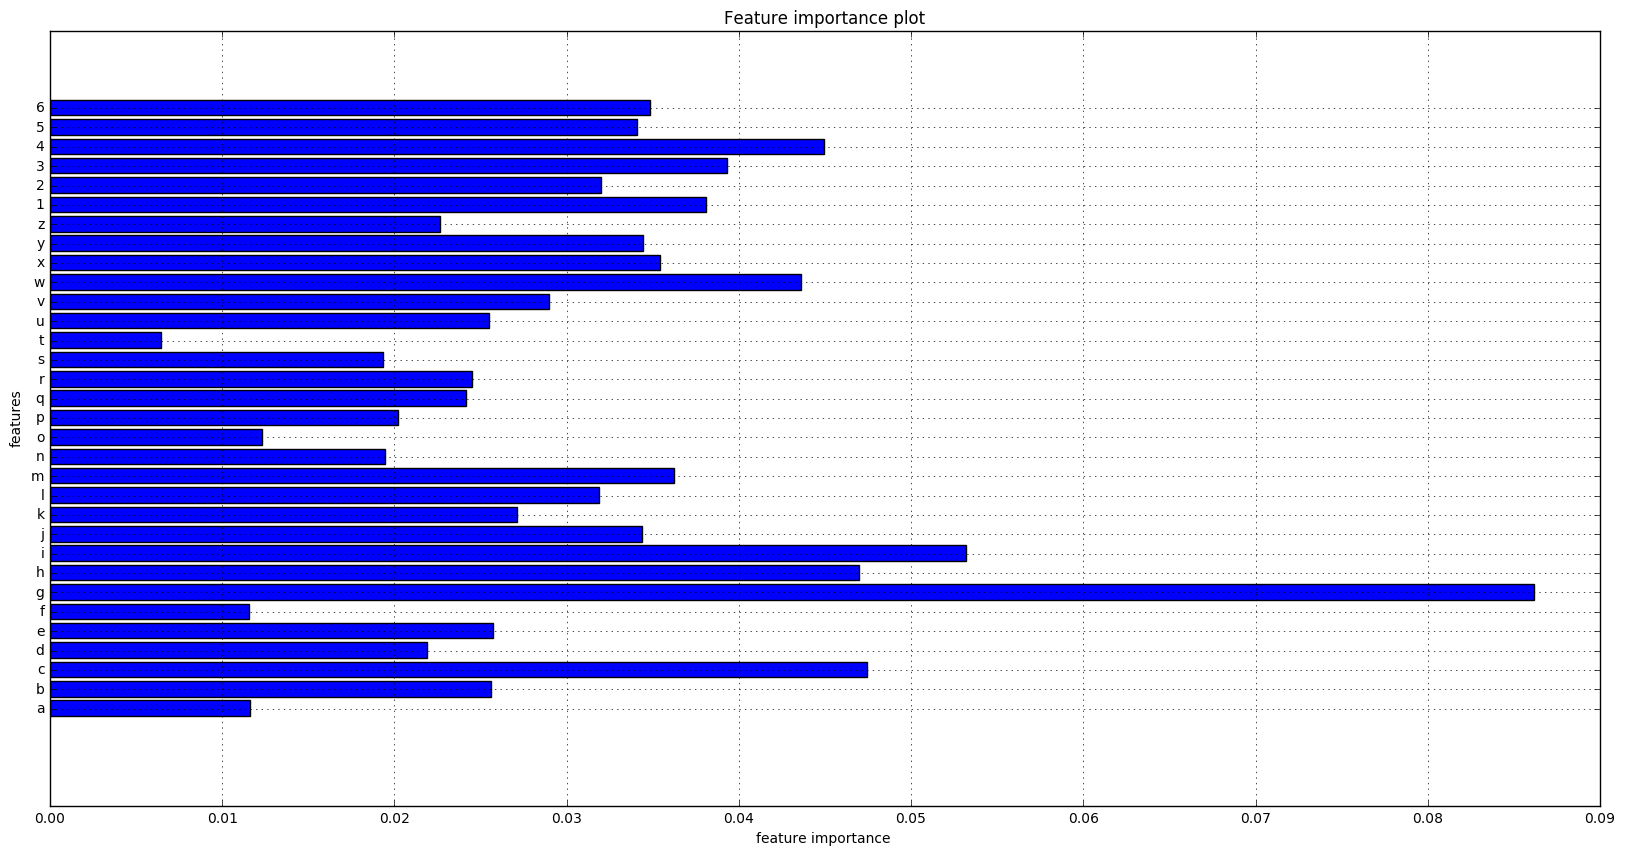

In [14]:
#bar plot of feature importance
values = model.feature_importances_
pos = np.arange(32) + 0.02
plt.barh(pos,values,align = 'center')
plt.title('Feature importance plot')
plt.xlabel('feature importance ')
plt.ylabel('features')
plt.yticks(np.arange(32),('a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i'
 'j' 'k' 'l' 'm' 'n' 'o'
 'p' 'q' 'r' 's' 't' 'u' 'v'
 'w' 'x' 'y' 'z' '1' '2' '3' '4' '5'
 '6'))
plt.grid(True)

So according to feature importance method, top 3 features are fnlwgt,age,hours-per-week.

Let's create training and testing datasets

Accuracy for 9 is 0.48484848484848486


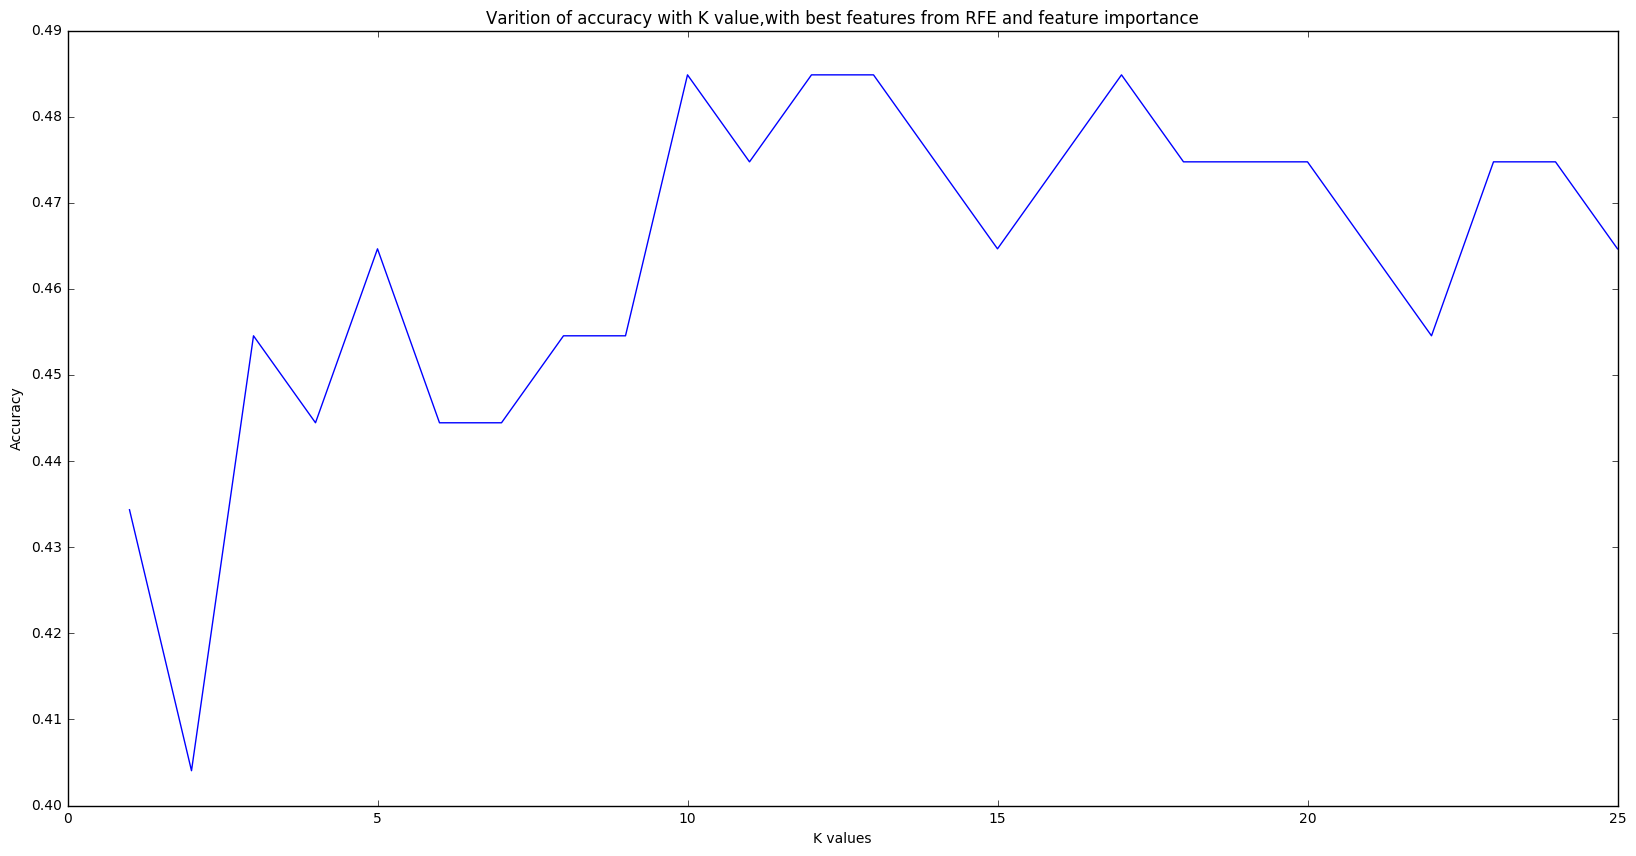

In [15]:
#updating features: combining best features from both RFE and feature importance
features = features[['school','Medu','internet','Fjob','age','Fedu']]

#here we have consider best features from both RFE and feature importance results

#spliting data into train and test data
X_train,X_test,y_train,y_test = train_test_split(features,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from RFE and feature importance')
plt.xlabel('K values')
plt.ylabel('Accuracy')

Accuracy for 10 is 0.4444444444444444


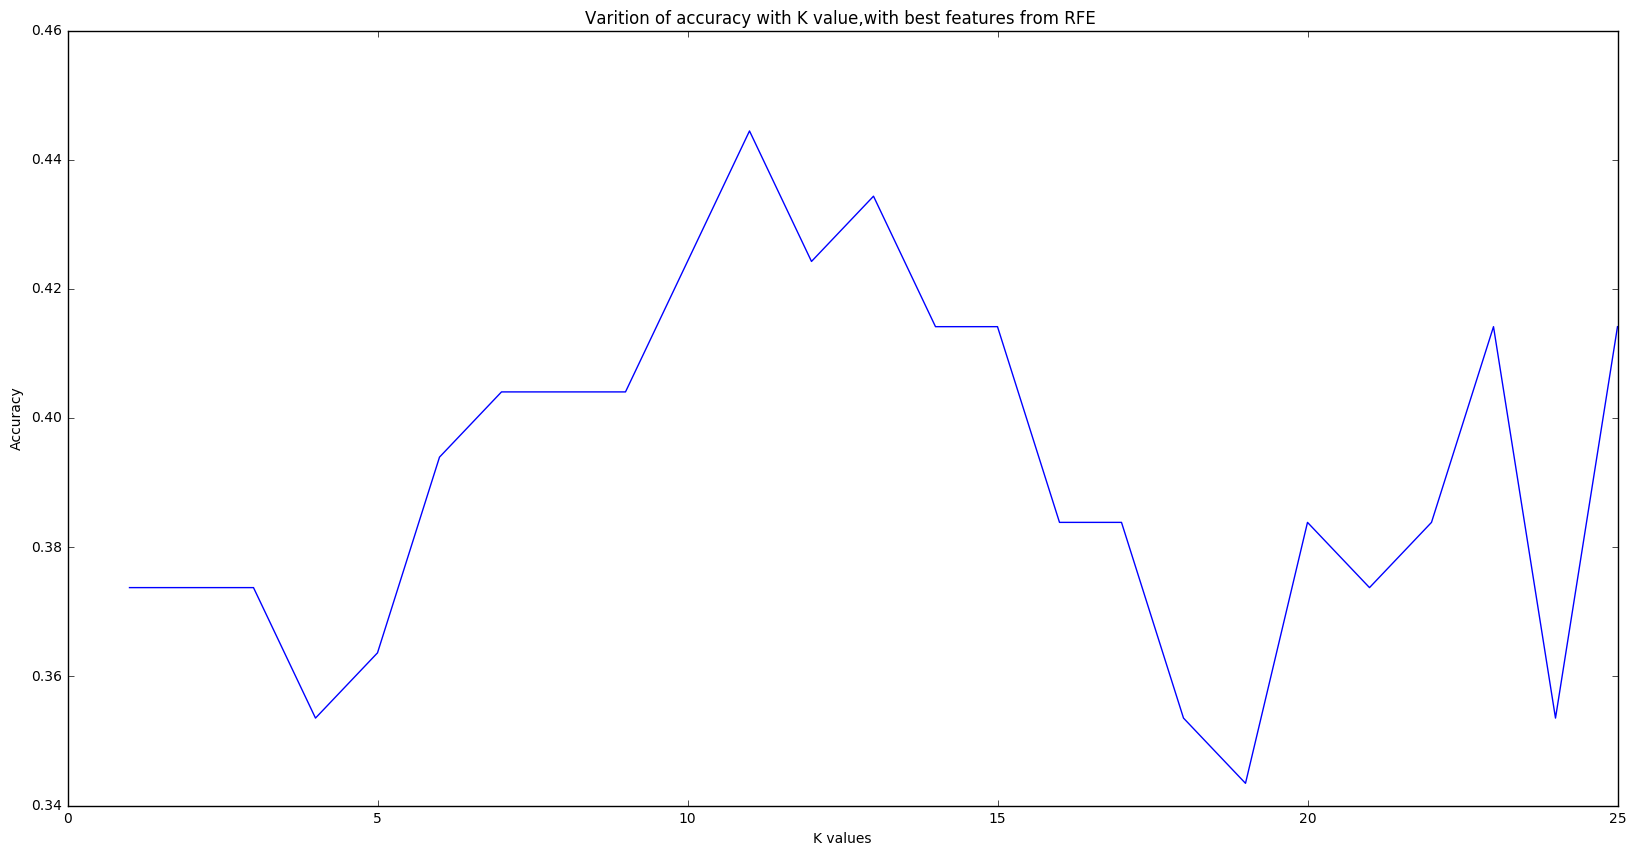

In [19]:
#Let's update features with the results of RFE and evaluate how
#accuracy varies

features1 = features[['school','Medu','internet']]

X_train,X_test,y_train,y_test = train_test_split(features1,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from RFE ')
plt.xlabel('K values')
plt.ylabel('Accuracy')

Accuracy for 24 is 0.47474747474747475


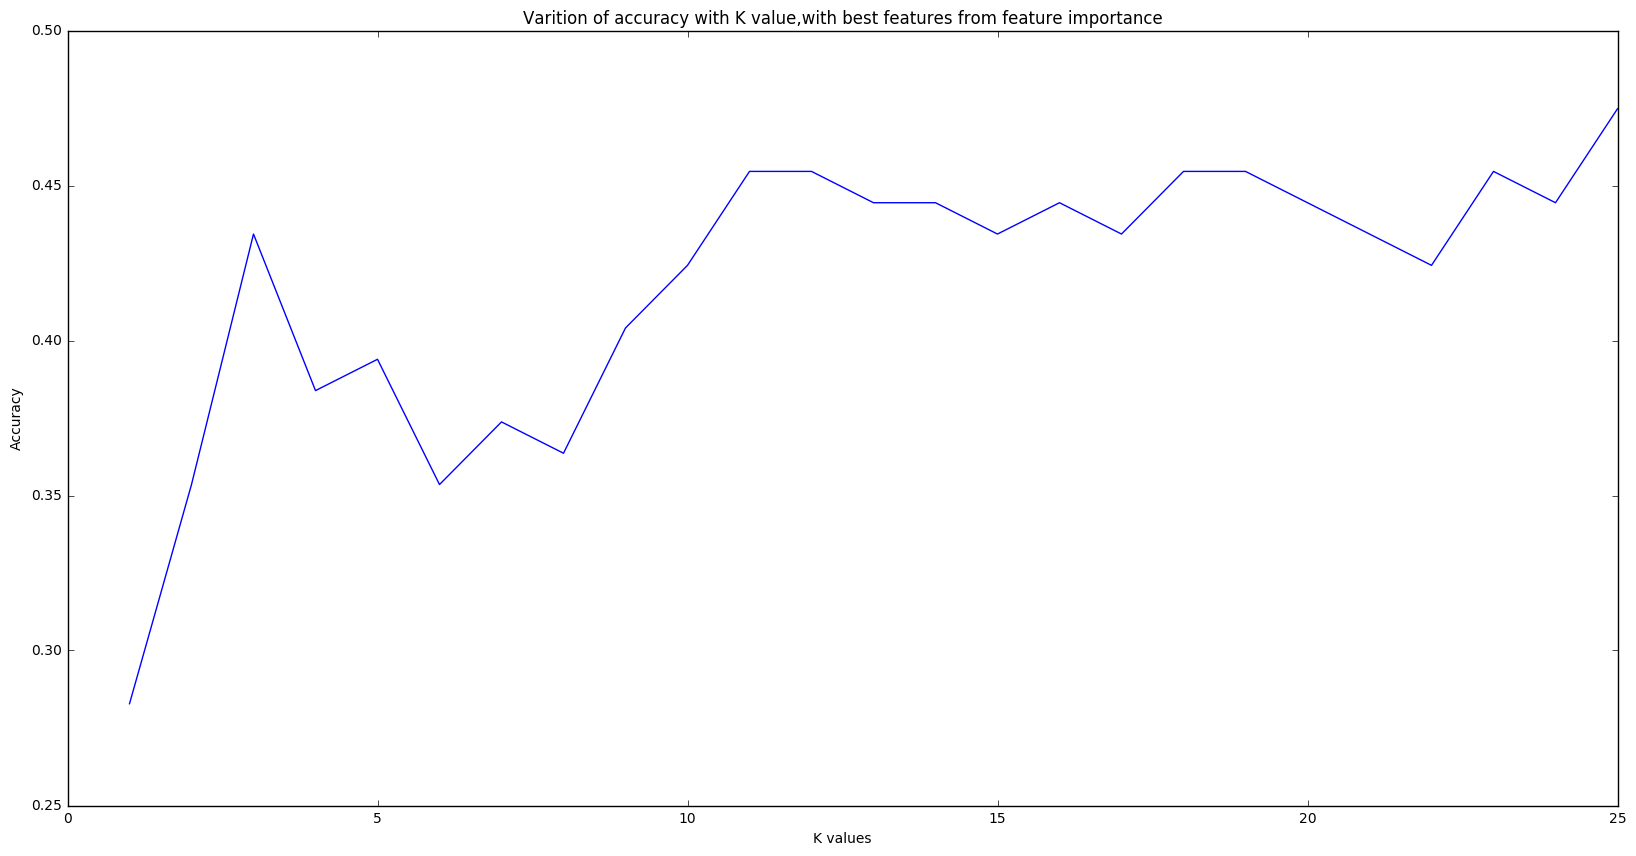

In [21]:
#Let's update features with the results of feature importance and evaluate how
#accuracy varies

features2 = features[['Fjob','age','Fedu']]

X_train,X_test,y_train,y_test = train_test_split(features2,target,random_state = 12)

from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1,26)
scores = []

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_predict))

print("Accuracy for {} is {}".format(np.argmax(scores),max(scores)))

plt.plot(np.arange(1,26),scores)
plt.title('Varition of accuracy with K value,with best features from feature importance')
plt.xlabel('K values')
plt.ylabel('Accuracy')

What is the need of comparing all three results (ie features from both RFE and feature importance,from RFE only and from feature importance only)?

In case of KNN, model works well when the input dimensions are small, as the input dimension increases the  performance of KNN decreases, because increase in dimension weakens the most important assumption on which KNN is built, which is  that closer points belongs to same class.

For more info, you can refer :[K-Nearest Neighbors for Machine Learning](http://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/)